<a href="https://colab.research.google.com/github/tombraganca/T-picos-em-Computa-o-I/blob/main/Complex_Networks_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required modules

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
# read in an edge list from the file 'test.txt'
G = nx.read_edgelist('/content/network_list.txt',
                     create_using=nx.Graph(),
                     delimiter=',',
                     nodetype=str,
                     encoding='utf-8')

In [ ]:
N = len(G)
L = G.size()
degrees = [G.degree(node) for node in G]
# alternate form, maybe less convenient
# degrees = list(dict(G.degree()).values())
kmin = min(degrees)
kmax = max(degrees)

In [ ]:
print("Number of nodes: ", N)
print("Number of edges: ", L)
print()
print("Average degree: ", 2*L/N)
print("Average degree (alternate calculation)", np.mean(degrees))
print()
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)

Number of nodes:  64
Number of edges:  62

Average degree:  1.9375
Average degree (alternate calculation) 1.9375

Minimum degree:  1
Maximum degree:  30


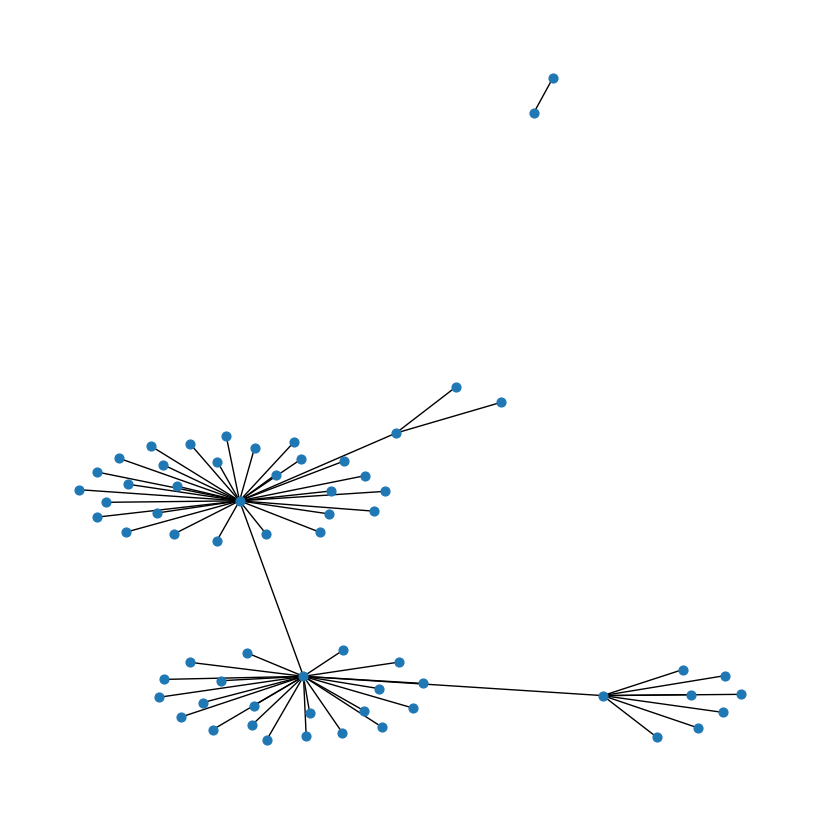

In [ ]:
# using the force-based or "spring" layout algorithm
fig = plt.figure(figsize=(8,8))
nx.draw_spring(G, node_size=40)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


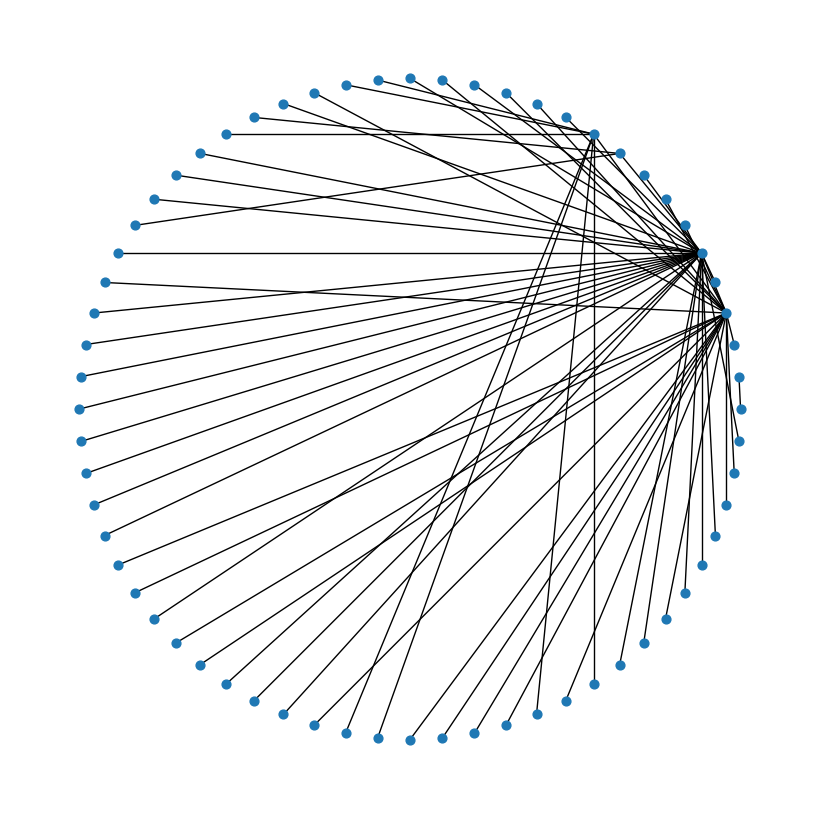

In [ ]:
# using the fcircular layout algorithm
fig = plt.figure(figsize=(8,8))
nx.draw_circular(G, node_size=40)

# Plotting the degree distribution

Let's plot it in log scale first

`numpy` can be used to get logarithmically-spaced bins between the minimum and maximum degree

In [ ]:
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

# `_` indicates that `np.histogram()` is returning a tuple of two items, and we don't care about
# what's in the second element. what is the other thing it's returning? check the docs:
# https://numpy.org/doc/stable/reference/generated/numpy.histogram.html

In [ ]:
bin_edges

array([ 1.        ,  1.4592328 ,  2.12936037,  3.10723251,  4.5341756 ,
        6.61641777,  9.65489385, 14.08873781, 20.55874836, 30.        ])

In [ ]:
density

array([2.07385219e+00, 0.00000000e+00, 1.62321998e-02, 0.00000000e+00,
       0.00000000e+00, 5.22400554e-03, 0.00000000e+00, 0.00000000e+00,
       1.68124063e-03])

now plot it

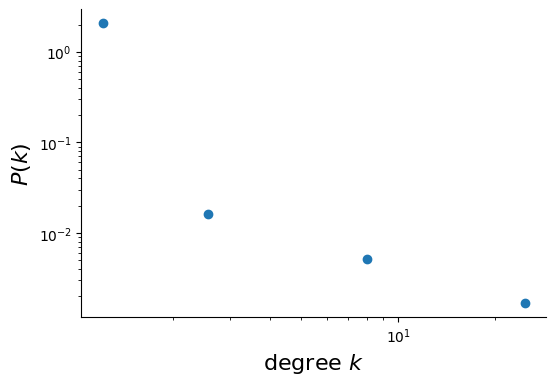

In [ ]:
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

This is clearly not a network with anything like a heavy-tailed or power law degree distribution.
Let's also plot it in linear-linear scale.

The `linspace` command in `numpy` is used to get linearly-spaced numbers between two extremes

In [ ]:
# Get 20 logarithmically spaced bins between kmin and kmax
bin_edges = np.linspace(kmin, kmax, num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

Now plot it

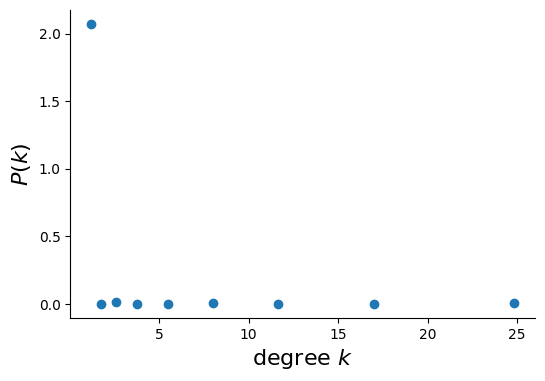

In [ ]:
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()